In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state = 42
filename = './datasets/exam2022_01_13.csv'
sep = ','

# 1

In [20]:
df = pd.read_csv(filename, sep=sep)
colname = df.columns[1:]
colname = colname.insert(0, 'language')
df.columns = colname
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [21]:
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')

Dataset with 329 rows and 13 columns


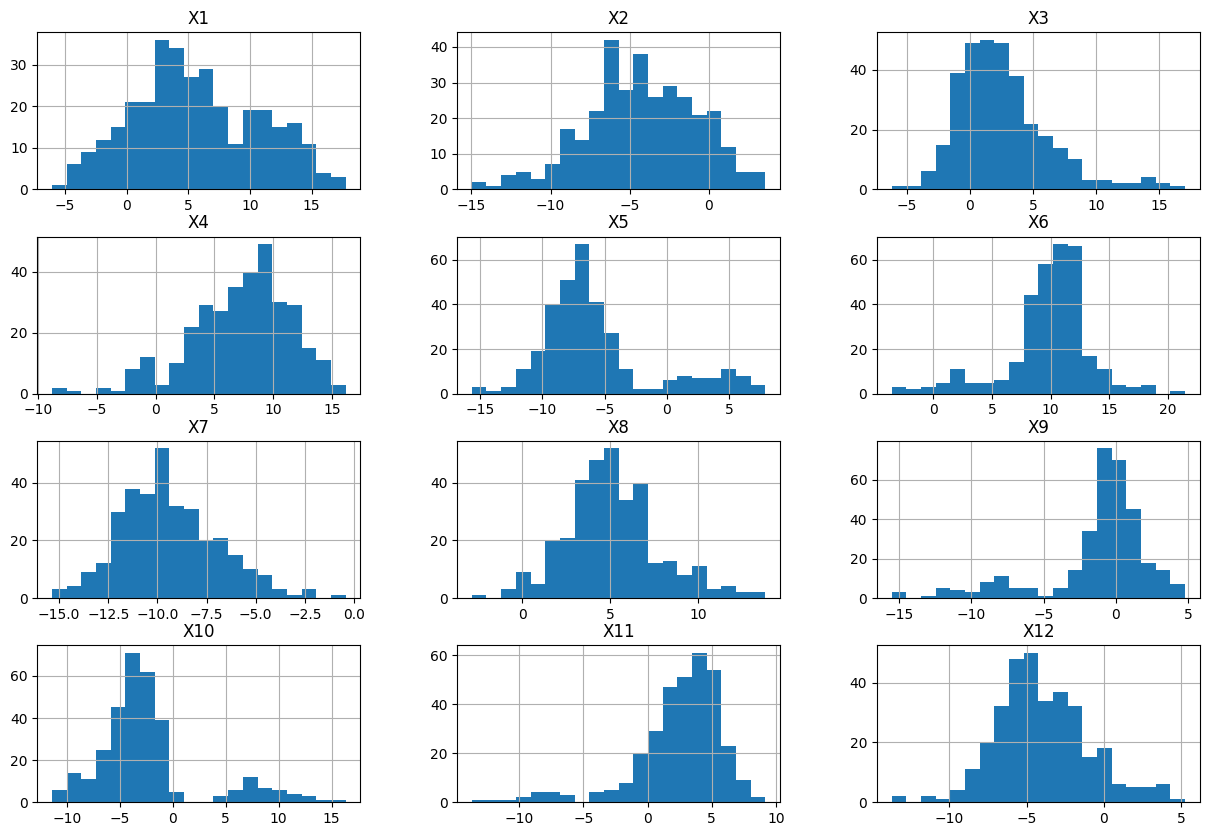

In [22]:
df.hist(figsize=(15, 10), bins=20);

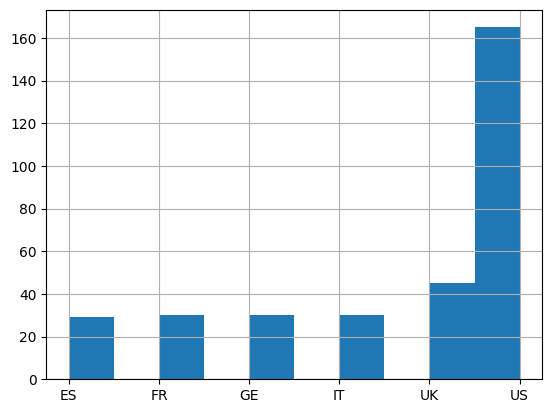

In [27]:
df['language'].hist(bins=10);

# 2

In [30]:
df1 = df.dropna(axis=0)
print(f'Number of rows with missing values: {df.shape[0] - df1.shape[0]}')
print(f'New shape: {df1.shape}')

Number of rows with missing values: 8
New shape: (321, 13)


# 3

In [32]:
from sklearn.model_selection import train_test_split

X = df1.drop('language', axis=1)
y = df1['language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix 

In [36]:
param_dt = {'max_depth': list(range(1,10))}

clf_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state),
    param_dt,
    cv=5,
    scoring='recall_macro'
);
clf_dt.fit(X_train, y_train);

# 4

In [38]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf_dt.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          ES       0.67      0.67      0.67         6
          FR       0.83      0.83      0.83         6
          GE       0.33      0.12      0.18         8
          IT       0.44      0.50      0.47         8
          UK       0.38      0.60      0.46         5
          US       0.79      0.81      0.80        32

    accuracy                           0.66        65
   macro avg       0.57      0.59      0.57        65
weighted avg       0.65      0.66      0.65        65



# 5

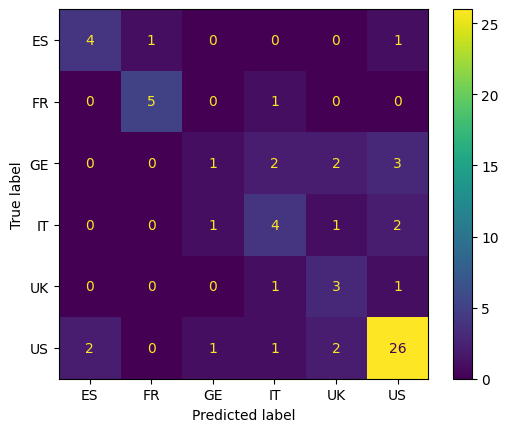

In [41]:
plot_confusion_matrix(clf_dt, X_test, y_test);

# 6

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [45]:
param_nb = [{'var_smoothing':[10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]}]
clf_nb = GridSearchCV(GaussianNB(), param_grid = param_nb, scoring = 'recall_macro', return_train_score = False, cv = 5, n_jobs = -1);
clf_nb.fit(X_train, y_train);

# 7

In [46]:
y_true, y_pred = y_test, clf_nb.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          ES       0.35      1.00      0.52         6
          FR       0.12      0.17      0.14         6
          GE       0.50      0.88      0.64         8
          IT       0.60      0.38      0.46         8
          UK       0.40      0.80      0.53         5
          US       0.82      0.28      0.42        32

    accuracy                           0.46        65
   macro avg       0.47      0.58      0.45        65
weighted avg       0.61      0.46      0.44        65



# 8

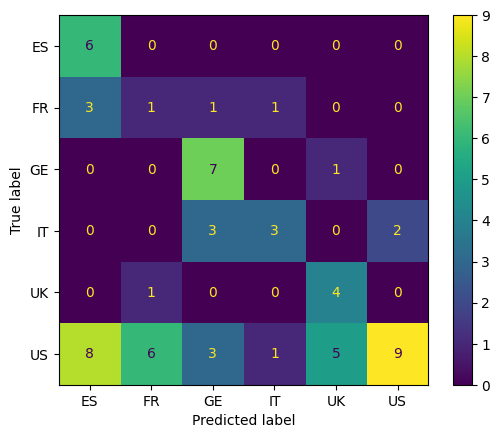

In [47]:
plot_confusion_matrix(clf_nb, X_test, y_true);